# Exercise 9.01  
Import Libraries & Process Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_training = pd.read_csv('GOOG_train.csv')
dataset_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,555.647278,556.788025,552.060730,554.481689,554.481689,3656400
1,2014-01-03,555.418152,556.379578,550.401978,550.436829,550.436829,3345800
2,2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551800
3,2014-01-07,560.399475,567.717041,558.486633,567.303589,567.303589,5124300
4,2014-01-08,570.860291,571.517822,564.528992,568.484192,568.484192,4501700


In [3]:
training_data = dataset_training[['Open']].values
training_data

array([[ 555.647278],
       [ 555.418152],
       [ 554.42688 ],
       ...,
       [1017.150024],
       [1049.619995],
       [1050.959961]])

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

training_data_scaled 

array([[0.08017394],
       [0.07987932],
       [0.07860471],
       ...,
       [0.67359064],
       [0.71534169],
       [0.71706467]])

Create Data Time Stamps & Rehape the Data

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08017394],
        [0.07987932],
        [0.07860471],
        ...,
        [0.10999004],
        [0.09405781],
        [0.08533808]],

       [[0.07987932],
        [0.07860471],
        [0.08628449],
        ...,
        [0.09405781],
        [0.08533808],
        [0.09263448]],

       [[0.07860471],
        [0.08628449],
        [0.09973538],
        ...,
        [0.08533808],
        [0.09263448],
        [0.08214508]],

       ...,

       [[0.90856424],
        [0.89708166],
        [0.91513484],
        ...,
        [0.6712118 ],
        [0.61797825],
        [0.63740721]],

       [[0.89708166],
        [0.91513484],
        [0.90270076],
        ...,
        [0.61797825],
        [0.63740721],
        [0.67359064]],

       [[0.91513484],
        [0.90270076],
        [0.86691601],
        ...,
        [0.63740721],
        [0.67359064],
        [0.71534169]]])

Create & Compile an RNN Architecure 

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Set the seed and initialize model

In [8]:
np.random.seed(1)

# initialize model
model = Sequential()

Add LSTM layers to model

In [9]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# Adding a second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# Adding a third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
model.add(LSTM(units = 50))

# Adding the output layer
model.add(Dense(units = 1))

Compile and fit the model

In [10]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0232
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0022
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0023
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0019
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0018
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0021
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0022
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0021
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0017
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0017
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/step - lo

Prepare the Test Data , Concatenate Test &  Train Datasets

In [11]:
dataset_testing = pd.read_csv("GOOG_test.csv")
actual_stock_price = dataset_testing[['Open']].values
actual_stock_price

array([[1016.570007],
       [1041.      ],
       [1032.589966],
       [1071.5     ],
       [1076.109985],
       [1081.650024],
       [1067.660034],
       [1063.180054],
       [1046.920044],
       [1050.170044],
       [1080.      ],
       [1079.469971],
       [1100.      ],
       [1088.      ],
       [1077.349976],
       [1076.47998 ],
       [1085.      ],
       [1080.109985],
       [1072.680054],
       [1068.430054],
       [1103.      ]])

In [12]:
total_data = pd.concat((dataset_training['Open'], dataset_testing['Open']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualize the Results

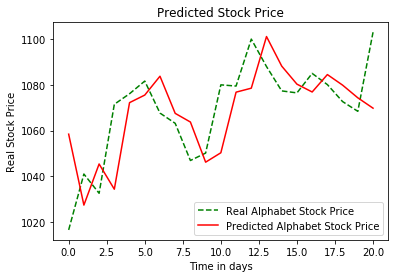

In [13]:
# Visualising the results
plt.plot(actual_stock_price, color = 'green', label = 'Real Alphabet Stock Price',ls='--')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Alphabet Stock Price',ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()